# 1.Data Preprocessing

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import scipy as scp
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv(r"E:\EXCELR\ASSIGNMENTS\ASSIGNMENT 7 - Clustering\EastWestAirlines.csv")
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
data.shape

(3999, 12)

In [7]:
data.nunique()

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [20]:
import numpy as np

def remove_outliers(data):
    # Convert the data to a numpy array for easier manipulation
    # data = np.array(data)
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the acceptable range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    Data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return Data

# # Example usage:
# data = [10, 12, 12, 13, 12, 11, 100, 14, 12, 12, 13, 11, 10, 13, 14, 12]
Data = remove_outliers(data)
print("Original Data:", data)
print("Data:", Data)


Original Data:        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_

In [19]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


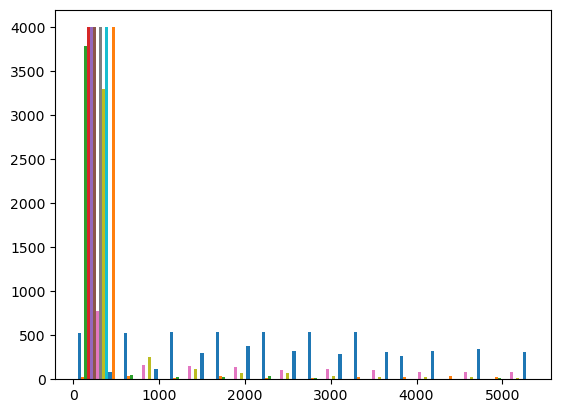

In [21]:
plt.hist(Data)
plt.show()

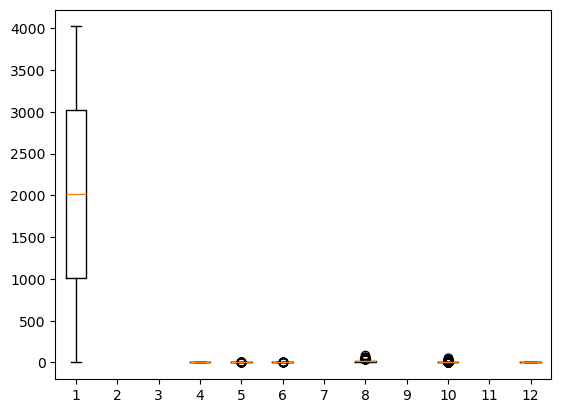

In [22]:
plt.boxplot(Data)
plt.show()

In [23]:
corr = Data.corr()
corr

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,0.042778,-0.010748,-0.224465,0.020291,-0.014707,-0.033728,-0.146915,-0.056953,-0.052096,-0.917674,-0.177901
Balance,0.042778,1.000000,0.053885,0.069021,0.055179,NaN,0.173754,0.097833,-0.055219,-0.032383,0.025311,-0.044681
Qual_miles,-0.010748,0.053885,1.000000,0.021880,-0.012488,-0.006269,0.052391,0.077075,0.152499,0.182957,0.006791,0.099344
cc1_miles,-0.224465,0.069021,0.021880,1.000000,-0.068223,0.060555,0.085197,0.608943,0.047206,0.041333,0.202542,0.335457
cc2_miles,0.020291,0.055179,-0.012488,-0.068223,1.000000,-0.006166,0.062212,0.064399,0.035336,0.028284,0.011111,0.005332
cc3_miles,-0.014707,NaN,-0.006269,0.060555,-0.006166,1.000000,NaN,0.097313,0.007227,-0.001117,0.017081,0.023484
Bonus_miles,-0.033728,0.173754,0.052391,0.085197,0.062212,NaN,1.000000,0.697151,0.325244,0.277991,0.062679,0.196414
Bonus_trans,-0.146915,0.097833,0.077075,0.608943,0.064399,0.097313,0.697151,1.000000,0.297822,0.432364,0.129243,0.333893
Flight_miles_12mo,-0.056953,-0.055219,0.152499,0.047206,0.035336,0.007227,0.325244,0.297822,1.000000,0.858651,0.059742,0.240879
Flight_trans_12,-0.052096,-0.032383,0.182957,0.041333,0.028284,-0.001117,0.277991,0.432364,0.858651,1.000000,0.037420,0.247909


<Axes: >

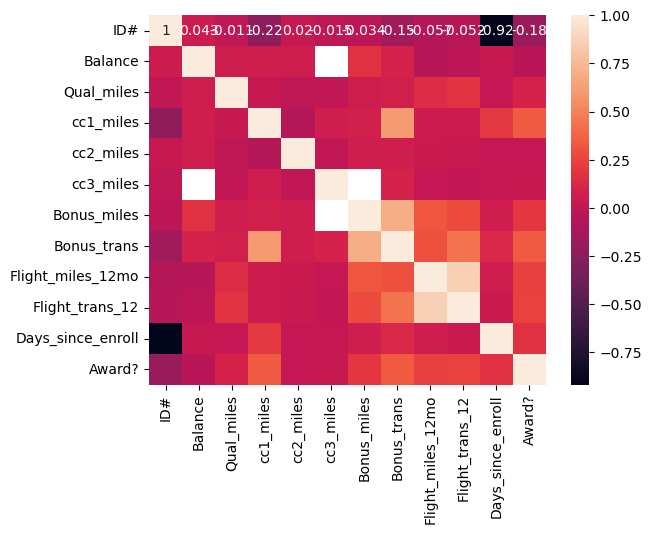

In [24]:
import seaborn as sns
sns.heatmap(corr, annot = True)

In [28]:
# data = pd.read_csv(r"E:\EXCELR\ASSIGNMENTS\ASSIGNMENT 7 - Clustering\EastWestAirlines.csv")
# data
x = data.iloc[:,2:].values
y = data.iloc[:,2].values

#Splitting the dataset into the training set and test set
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2999, 10), (1000, 10), (2999,), (1000,))

# KNN algorithm

In [29]:
#Fitting KNN classifier to the training set
classifier_knn = KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
#Predicting the test set result
y_pred1 = classifier_knn.predict(x_test)
y_pred1

array([   0,    0,    0,    0,    0,    0, 1674,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3692,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [31]:
#Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[949,   0,   0, ...,   0,   0,   0],
       [  6,   0,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0]], dtype=int64)

In [32]:
cl = classification_report(y_test, y_pred1)
print(cl)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       949
         500       0.00      0.00      0.00         6
         719       0.00      0.00      0.00         1
         733       0.00      0.00      0.00         2
         810       0.00      0.00      0.00         1
         862       0.00      0.00      0.00         1
         957       0.00      0.00      0.00         1
         967       0.00      0.00      0.00         2
        1000       0.00      0.00      0.00         5
        1112       0.00      0.00      0.00         0
        1115       0.00      0.00      0.00         1
        1199       0.00      0.00      0.00         0
        1249       0.00      0.00      0.00         0
        1452       0.00      0.00      0.00         2
        1514       0.00      0.00      0.00         1
        1621       0.00      0.00      0.00         1
        1674       0.00      0.00      0.00         0
        1692       0.00    

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classif

# Choosing K values 

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn =KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X,y,cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

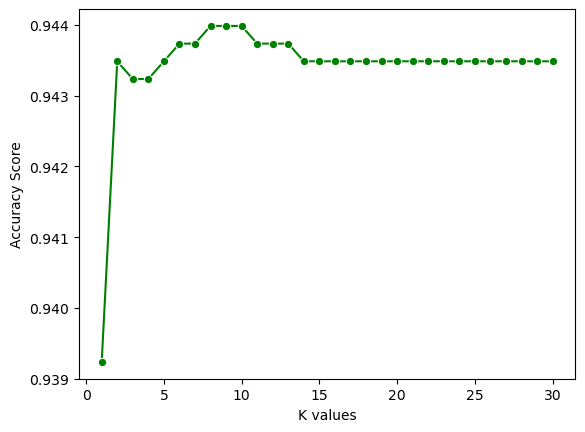

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x= k_values, y=scores,marker = 'o',color='green')
plt.xlabel("K values")
plt.ylabel("Accuracy Score")

In [36]:
print(score)

[0.94375   0.94375   0.94375   0.9425    0.9436796]


In [38]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print(accuracy)

0.9416472157385796


In [40]:
cl = classification_report(y_train, y_pred)
cl

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98      2824\n         250       0.00      0.00      0.00         1\n         500       0.00      0.00      0.00         9\n         588       0.00      0.00      0.00         1\n         589       0.00      0.00      0.00         2\n         629       0.00      0.00      0.00         1\n         651       0.00      0.00      0.00         1\n         733       0.00      0.00      0.00         1\n         739       0.00      0.00      0.00         1\n         745       0.00      0.00      0.00         1\n         763       0.00      0.00      0.00         1\n         783       0.00      0.00      0.00         1\n         862       0.00      0.00      0.00         1\n         867       0.00      0.00      0.00         2\n         888       0.00      0.00      0.00         4\n         899       0.00      0.00      0.00         1\n         909       0.00      0.00      0.00         1\n       

# Guassian naive vayes algorithm

In [41]:
#Fitting the Naive Bayes to the traing set
from sklearn.naive_bayes import GaussianNB, BernoulliNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [42]:
#Predicting the Test set results
y_pred2 = classifier_nb.predict(x_train)
y_pred3 = classifier_nb.predict(x_test)

In [43]:
#Making the Confusion Matrix
cm = confusion_matrix(y_train, y_pred2)
print(cm)

[[2824    0    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    0    9 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]


In [44]:
clr = classification_report(y_train,y_pred2)
clr_test = classification_report(y_test,y_pred3)
print(clr)
print(clr_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2824
         250       1.00      1.00      1.00         1
         500       1.00      1.00      1.00         9
         588       1.00      1.00      1.00         1
         589       1.00      1.00      1.00         2
         629       1.00      1.00      1.00         1
         651       1.00      1.00      1.00         1
         733       1.00      1.00      1.00         1
         739       1.00      1.00      1.00         1
         745       1.00      1.00      1.00         1
         763       1.00      1.00      1.00         1
         783       1.00      1.00      1.00         1
         862       1.00      1.00      1.00         1
         867       1.00      1.00      1.00         2
         888       1.00      1.00      1.00         4
         899       1.00      1.00      1.00         1
         909       1.00      1.00      1.00         1
         925       1.00    

# Decision tree algorithm

In [45]:
#Fitting Decision Tree classifier to thr training set
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
classifer_DT = DecisionTreeClassifier(criterion='gini',random_state=0)
classifer_DT.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [46]:
#Predicting the test set result
y_pred3 = classifer_DT.predict(x_train)
y_pred3

array([   0,    0, 2505, ...,    0,    0,    0], dtype=int64)

[Text(0.16391815819861433, 0.98, 'x[0] <= 125.0\ngini = 0.113\nsamples = 2999\nvalue = [2824, 1, 9, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2\n4, 1, 1, 1, 1, 2, 1, 12, 1, 1, 1, 1, 1, 1\n1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1\n1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.15468028290993072, 0.94, 'gini = 0.0\nsamples = 2824\nvalue = [2824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

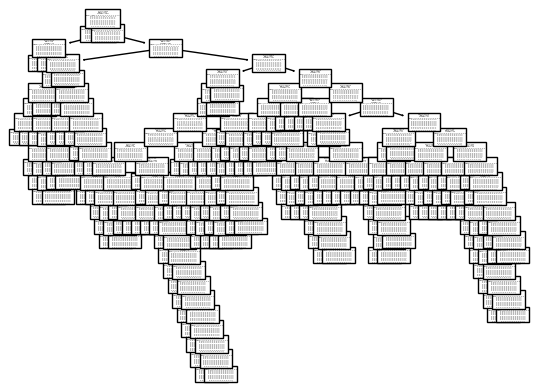

In [47]:
plot_tree(classifer_DT)

In [48]:
#Creating the confusion matrix
cm = confusion_matrix(y_train,y_pred3)
print(cm)
clr = classification_report(y_train, y_pred3)
print(clr)

[[2824    0    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    0    9 ...    0    0    0]
 ...
 [   0    0    0 ...    1    0    0]
 [   0    0    0 ...    0    1    0]
 [   0    0    0 ...    0    0    1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2824
         250       1.00      1.00      1.00         1
         500       1.00      1.00      1.00         9
         588       1.00      1.00      1.00         1
         589       1.00      1.00      1.00         2
         629       1.00      1.00      1.00         1
         651       1.00      1.00      1.00         1
         733       1.00      1.00      1.00         1
         739       1.00      1.00      1.00         1
         745       1.00      1.00      1.00         1
         763       1.00      1.00      1.00         1
         783       1.00      1.00      1.00         1
         862       1.00      1.00      1.00         1
         867   

# Support vector machine

In [49]:
from sklearn.svm import SVC #Support vector classifier
classifier_svm = SVC(kernel = 'poly',random_state=0)
classifier_svm.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [50]:
#Predicting the test set result
y_pred4 = classifier_svm.predict(x_train)

In [51]:
#Creating the confusion matrix
cm = confusion_matrix(y_train, y_pred4)
print(cm)
clr = classification_report(y_train, y_pred4)
print(clr)

[[2824    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   8    0    1 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2824
         250       0.00      0.00      0.00         1
         500       1.00      0.11      0.20         9
         588       1.00      1.00      1.00         1
         589       0.00      0.00      0.00         2
         629       0.00      0.00      0.00         1
         651       0.00      0.00      0.00         1
         733       0.00      0.00      0.00         1
         739       0.00      0.00      0.00         1
         745       0.00      0.00      0.00         1
         763       0.00      0.00      0.00         1
         783       0.00      0.00      0.00         1
         862       0.00      0.00      0.00         1
         867   

In [34]:
y_pred4.shape

(2999,)

In [35]:
#Plot ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr1, tpr1, thresholds1 = roc_curve(y_train, y_pred1)
fpr2, tpr2, thresholds2 = roc_curve(y_train, y_pred2)
fpr3, tpr3, thresholds3 = roc_curve(y_train, y_pred3)
fpr4, tpr4, thresholds4 = roc_curve(y_train, y_pred4)

plt.figure(figsize=(8,6))
plt.plot(fpr1, tpr1, linewidth=2, label = 'KNN')
plt.plot(fpr2, tpr2, linewidth=2,color = 'g', label = 'GNB')
plt.plot(fpr3, tpr3, linewidth=2,color = 'r', label = 'DT')
plt.plot(fpr4, tpr4, linewidth=2,color = 'm', label = 'SVC')
plt.plot([0,1],[0,1], 'k--')
plt.rcParams['font.size'] =12
plt.title('ROC curve for predicting a car purchase classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc = 'lower right')
plt.show()

ValueError: multiclass format is not supported

In [68]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K-Means
silhouette_kmeans = silhouette_score(data, kmeans.labels_)
print("Silhouette Score for K-Means:", silhouette_kmeans)


Silhouette Score for K-Means: 0.6485135145173909


# DBSCAN algorithm

In [69]:
from sklearn.cluster import DBSCAN

eps = 0.5  # epsilon, the maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 5  # minimum number of samples in a neighborhood for a point to be considered as a core point

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

DBSCAN()

In [70]:
# Get cluster labels for each data point
labels = dbscan.labels_

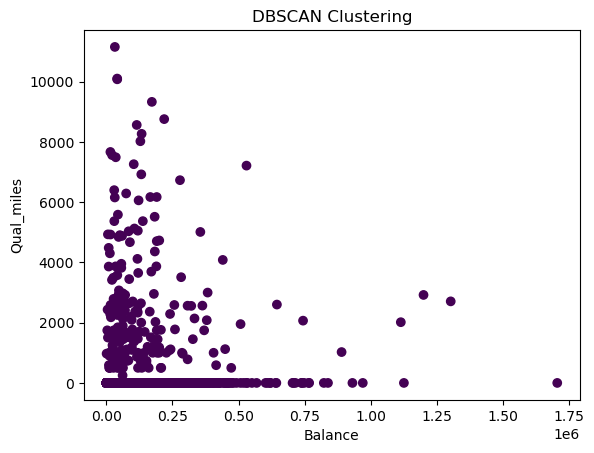

In [71]:
import matplotlib.pyplot as plt

# Visualize clusters (2D example)
plt.scatter(data['Balance'], data['Qual_miles'], c=labels, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('DBSCAN Clustering')
plt.show()

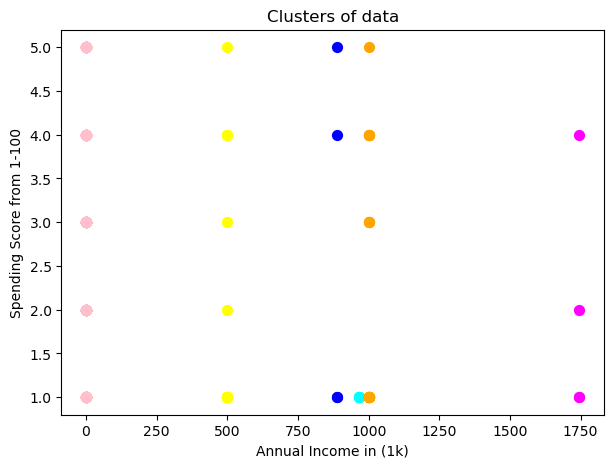

In [77]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x.iloc[y_means == 0, 0], x.iloc[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x.iloc[y_means == 1, 0], x.iloc[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x.iloc[y_means == 2, 0], x.iloc[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x.iloc[y_means == 4, 0], x.iloc[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x.iloc[y_means == 5, 0], x.iloc[y_means == 5, 1], s = 50, c = 'blue')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()